# Lasso Regression

Using Lasso Regression to estimate `ViolentCrimesPerPop` based on the dataset provided

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lasso import lasso_solver, load_data, lasso_models, plot_regpath, plot_sqerr, plot_nonzero
%matplotlib inline

# load all the data
X_train, y_train, X_val, y_val, X_test, y_test, df_train, df_test = load_data('data', validation=True, valsplit=0.1)
# X_train, y_train, X_test, y_test, df_train, df_test = load_data('data')

## 1. Building the Models
First we use the `lasso_models` method to get `W` that is a `10x95` matrix that has parameter for all 10 values of `lambda` or `reg`

In [7]:
# build models for all 10 lamdas
regs = np.array([600.0 / (2 ** i) for i in range(10)])
W = lasso_models(X_train, y_train, regs)

## 2. Plot: Regularization Paths
The regularization paths (in one plot) for the coefficients for input variables agePct12t29,
pctWSocSec, PctKids2Par, PctIlleg, and HousVacant — use log(λ) instead of λ.

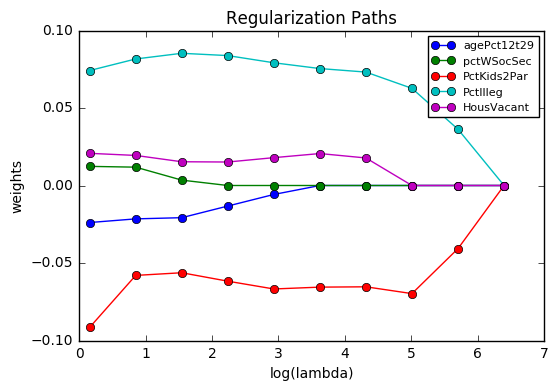

In [8]:
# plot regularization paths
features = ['agePct12t29', 'pctWSocSec', 'PctKids2Par', 'PctIlleg', 'HousVacant']
ids = [df_train.columns.get_loc(feature) - 1 for feature in features]
plot_regpath(W, regs, features, ids)

## 3. Plot: Squared Error In The Training Dataset

A plot of log(λ) against the squared error in the training data.

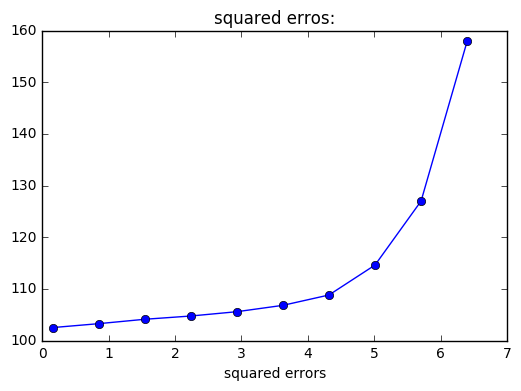

In [9]:
# plot squared errors for training data
plot_sqerr(X_train, y_train, W, regs)

## 4. Plot: Squared Error In Test Dataset
A plot of log(λ) against the squared error in the test data.

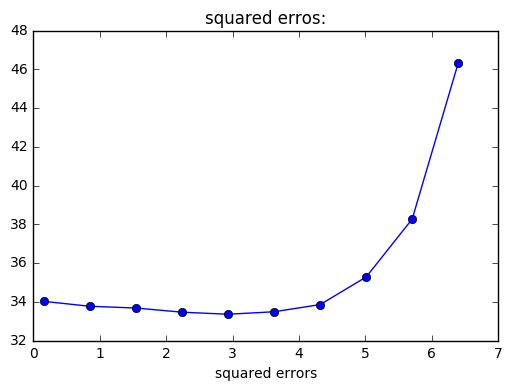

In [10]:
# plot squared errors for testing data
plot_sqerr(X_test, y_test, W, regs)

## 5. Plot: Number of Non-Zero Coefficients
A plot of λ against the number of nonzero coefficients

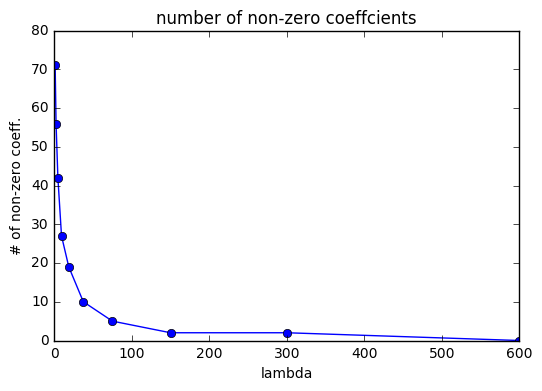

In [12]:
# plot number of non-zero coeffcients
plot_nonzero(W, regs)